## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 10
---------------------------------------

GOALS:

1. Practice the principles of good data visualization.
2. Work on more advanced plotting.

----------------------------------------------------------

This homework has **2 questions** and **2 exercises**.


In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [37]:
file_name = 'data/brexit.csv'
DF = pd.read_csv(file_name)

## Do opinions about Brexit depend on region?

**Am I clearly answering my question with these pictures?**

In [38]:
mask = DF['location'] != 'total'
DF_plot=DF[mask]

DF_plot['location'].replace('london','London',inplace=True)
DF_plot['location'].replace('rest_of_south','Rest of South',inplace=True)
DF_plot['location'].replace('midlands_wales','Midlands and Wales',inplace=True)
DF_plot['location'].replace('north','North',inplace=True)
DF_plot['location'].replace('scot','Scotland',inplace=True)

In [39]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='location',x='count',
             color='vote',
             color_discrete_sequence=px.colors.qualitative.Safe)

fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories },
                  title='Count of Votes in YouGov Survey - Location Level',
                  xaxis_title="Count of Votes",
                  yaxis_title="Vote",
                  template='ggplot2',
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

In [40]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             color='location',
             facet_col='location',
            color_discrete_sequence=px.colors.qualitative.Safe)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='Count of Votes in YouGov Survey - Location Level',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500)

fig.show()

**Q** Which of the plots do you think is better. What you do notice are the pluses and minuses of each figure?

**The second plot is better because it is easier to interpret just based off initial looks since each Location is divied up into their own seperate graphs making it easier as the interpreter.**

**Q** Is there any redundancy in the second graph? What is redundant?

**The legend is definitelty redundant in tbis scenario since the titles of the graph are already describing the location and they are divied up with their own unique colors.**

## Avoid Redundancy

Here is the same graph again, but avoiding redundancy.

In [41]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             facet_col='location',
            color_discrete_sequence=['gray'])

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='Count of Votes in YouGov Survey - Location Level',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500)

fig.show()

In [42]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             color='location',
             facet_col='location',
            color_discrete_sequence=px.colors.qualitative.Safe)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='In hindsight, do you think Britain was right/wrong to vote to leave EU?',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500,
                 showlegend=False)

fig.show()

**Q** Which of these two plots do you like better and why?

**Out of the two plots, I like the one that utilizes color better. When you oly use the one color in the graph it diminishes the uniqueness of each categorized graph and makes it harder for the interpreter to understand, one top of this grey is simply a boring and bland color.**

## Selecting meaningful colors.

[colorbrewer.org](https://colorbrewer2.org/)

Here is an example where colors were picked on the website above and the the codes were put into the color_discrete_map.

In [43]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             color='vote',
             facet_col='location',
             color_discrete_map={'Right':'#91bfdb','Wrong':'#fc8d59',"Don’t know":'#ffffbf'})

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='In hindsight, do you think Britain was right/wrong to vote to leave EU?',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500,
                 showlegend=False)

fig.show()


### Exercise 1 (Choose one!)

#### Data Vis Principles:

1. Order Matters
2. Put long categories on the y-axis
3. Pick a Purpose.
4. Keep scales consistent
5. Select meaningful colors
6. Use meaningful and nonredundant labels.

**Option 1.** 

Create your own plot of this data. Make it as nice as possible! Choose your own colors, themes, labels, ordering, etc. Decide if you prefer facets or colored bars. Make the labels as informative as possible. Try experimenting with things we haven't yet covered in class: look up how to add a caption or include textures in your plot.

Talk about the positives and negatives of your graph. How does it meet, not meet, or exceed the data visualization principles above?

**Option 2.**

Using data of your choice, create a beautiful data visualization. Try experimenting with things we haven't yet covered in class: look up how to add a caption or include textures in your plot.

Talk about the positives and negatives of your graph. How does it meet, not meet, or exceed the data visualization principles above?

In [44]:
nba_file_name = 'data/nba2023.csv'
DF_nba = pd.read_csv(nba_file_name)
##DF_nba

In [45]:
nba = DF_nba.copy()
mask = (DF_nba['PTS'] >= 1230)
nba = nba[mask]

nba['PPG'] = nba['PTS'] / 82
nba['APG'] = nba['AST'] / 82
nba['RPG'] = nba['REB'] / 82
nba['SPG'] = nba['STL'] / 82
nba['BPG'] = nba['BLK'] / 82

columns = ['PName', 'Age', 'POS', 'PPG', 'APG', 'RPG', 'SPG', 'BPG']
nba = nba[columns]

nba.rename(columns={'PName':'Player'}, inplace=True)

nba = nba.sort_values(by="PPG", ascending=False)

##Shows the top 25 players based off of PPG
nba = nba.head(25)

##Groups by 'POS' and give us the count of the players found in each 'POS'
nba['y_stack'] = nba.groupby('POS').cumcount()+1

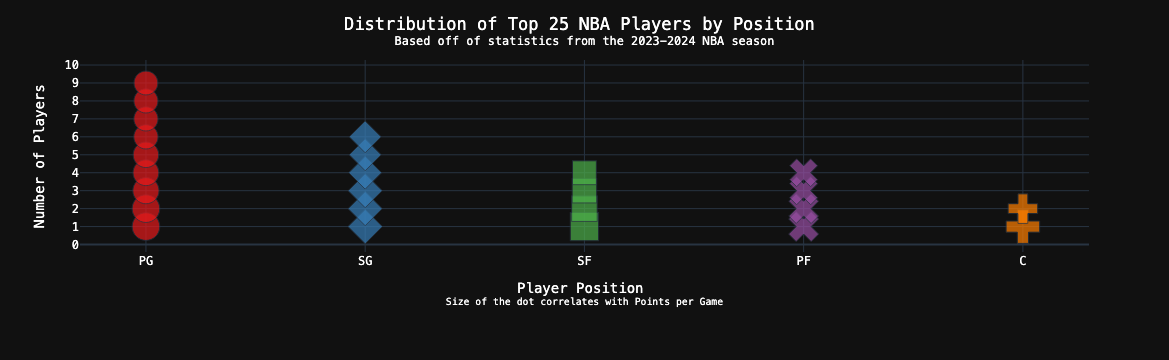

In [52]:
my_categories = ['PG', 'SG', 'SF', 'PF', 'C']
fig = px.scatter(
    nba,
    x='POS',
    y='y_stack',
    size = 'PPG',
    color='POS',  
    hover_name='Player', 
    hover_data={'PPG': ':.1f', 'y_stack': False}, 
    category_orders={'POS': my_categories},
    color_discrete_sequence=px.colors.qualitative.Set1,
    symbol="POS"
)


fig.update_layout(
    title='Distribution of Top 25 NBA Players by Position <br><sup>Based off of statistics from the 2023-2024 NBA season</sup><br><br>',
    title_x=0.5,
    xaxis_title='Player Position <br><sup>Size of the dot correlates with Points per Game</sup><br><br>',
    yaxis_title='Number of Players',
    autosize =True,
    showlegend=False, 
    template='plotly_dark',
    font={'family':"Balto, monospace",'size':12,'color':"White"},
    yaxis=dict(
        tickmode='linear', 
        tick0=1,         
        dtick=1          
    )
)

fig.show()


**The positives about my graph is that it is easy to differentiate what position is what, not only does each position category have its own assigned color, it also has its own assigned shape aswell making it easy to see what position makes up the most of the NBA's top 25 players. I also believe that the message of the graph is clear, it shows the interpreter that the NBA is a guard dominated league where the presence of the big man (aka the Center or Power Forward) has diminished completely in this new era of basketball. This graph meets the data visualization process with clear and concise points that clearly vary, however it is not necessarily aesthetically pleasing. Maybe for future reference I could have used a histogram but for this situation I believed a scatter plot would clearly present the information and give the interpreter access to more information outside of the number of player's each position holds (in the Top 25 NBA Players dataset), such as player name and the points per game they averaged in the 2023-2024 NBA season. So I believe I meet the data visualization principles above by making an easy to interpret yet informative graph, but there is room for improvement by making it more pleasing to look at.**